In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Diwali Sales Data.csv")

In [3]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [4]:
df.drop(columns=["Status","unnamed1"],inplace=True)

In [5]:
df.shape

(11251, 13)

In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df['Amount']=df['Amount'].astype(int)

In [10]:
df[['Amount','Orders','Marital_Status','Age']].describe()

,Amount,Orders,Marital_Status,Age
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,9453.610553,2.489634,0.420055,35.410357
std,5222.355168,1.114967,0.493589,12.753866
min,188.000000,1.000000,0.000000,12.000000
25%,5443.000000,2.000000,0.000000,27.000000
50%,8109.000000,2.000000,0.000000,33.000000
75%,12675.000000,3.000000,1.000000,43.000000
max,23952.000000,4.000000,1.000000,92.000000


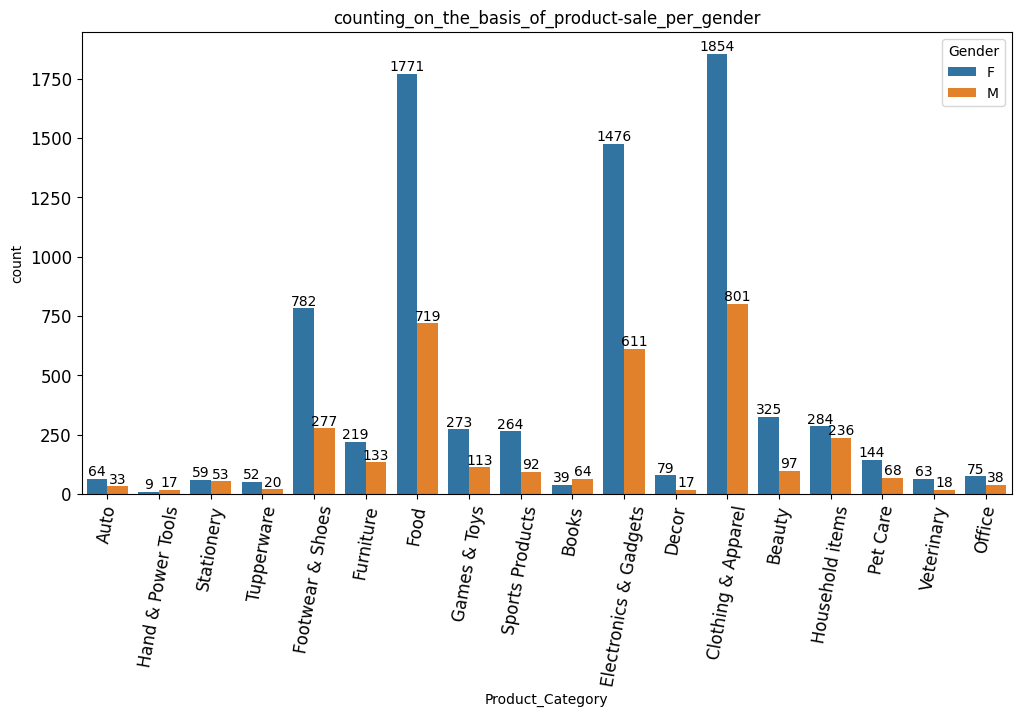

In [11]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x='Product_Category',data=df,hue='Gender',linewidth=100)
plt.title("counting_on_the_basis_of_product-sale_per_gender")
plt.xticks(rotation=80, fontsize=12)  # Increase x-axis label font size
plt.yticks(fontsize=12)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


In [12]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

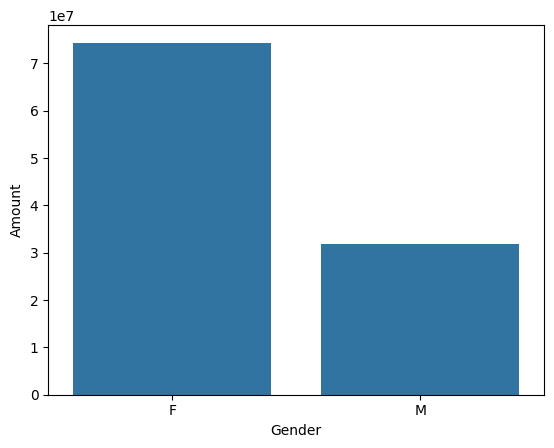

In [13]:
data=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=data)

<Axes: xlabel='Age', ylabel='Count'>

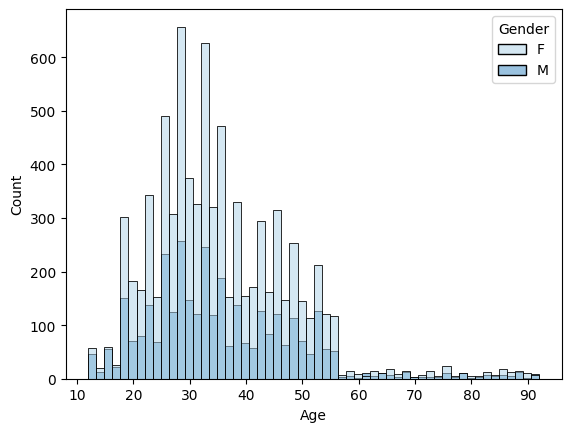

In [14]:
sns.histplot(x='Age',data=df,hue='Gender',palette='Blues')

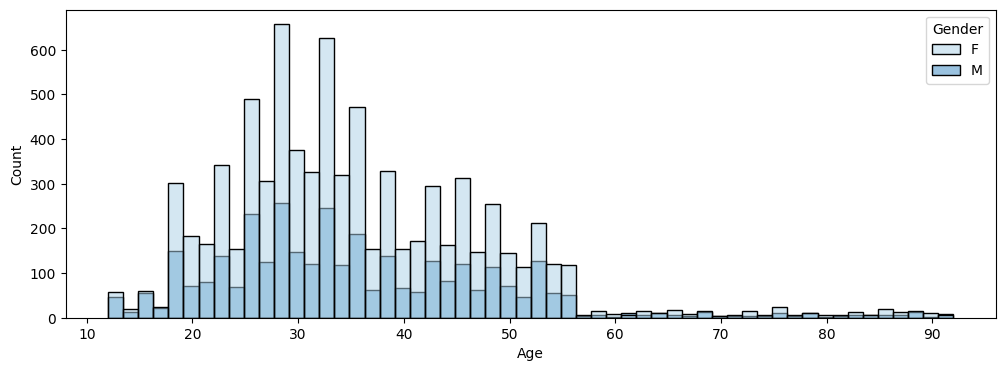

In [15]:
plt.figure(figsize=(12,4))
ax=sns.histplot(x='Age',data=df,hue='Gender',palette='Blues')
for bars in ax.containers:
    ax.bar_label=(bars)

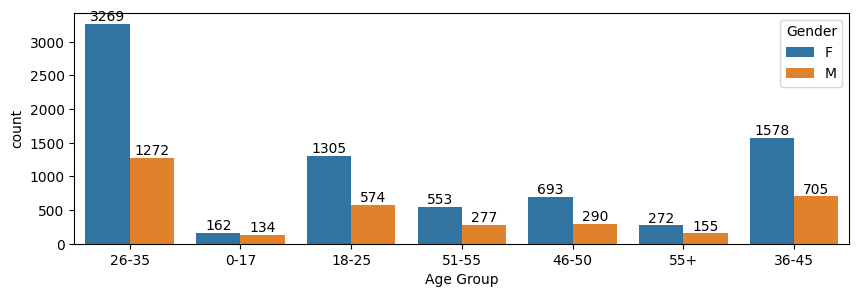

In [16]:
plt.figure(figsize=(10,3))
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1068\3169014655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Age Group', y='Amount', data=data,order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'],palette='Accent')


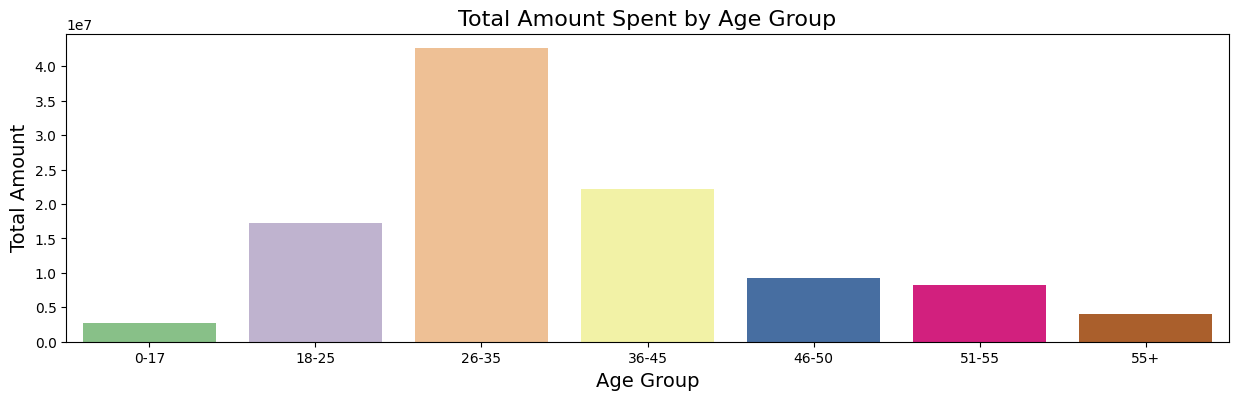

In [17]:
data = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15, 4))
ax=sns.barplot(x='Age Group', y='Amount', data=data,order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'],palette='Accent')
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Total Amount", fontsize=14)
plt.title("Total Amount Spent by Age Group", fontsize=16)
# for bars in ax.containers:
#     ax.bar_label(bars)
plt.show()


In [18]:
print(df.columns)

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


In [19]:
df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)



,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra?radesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


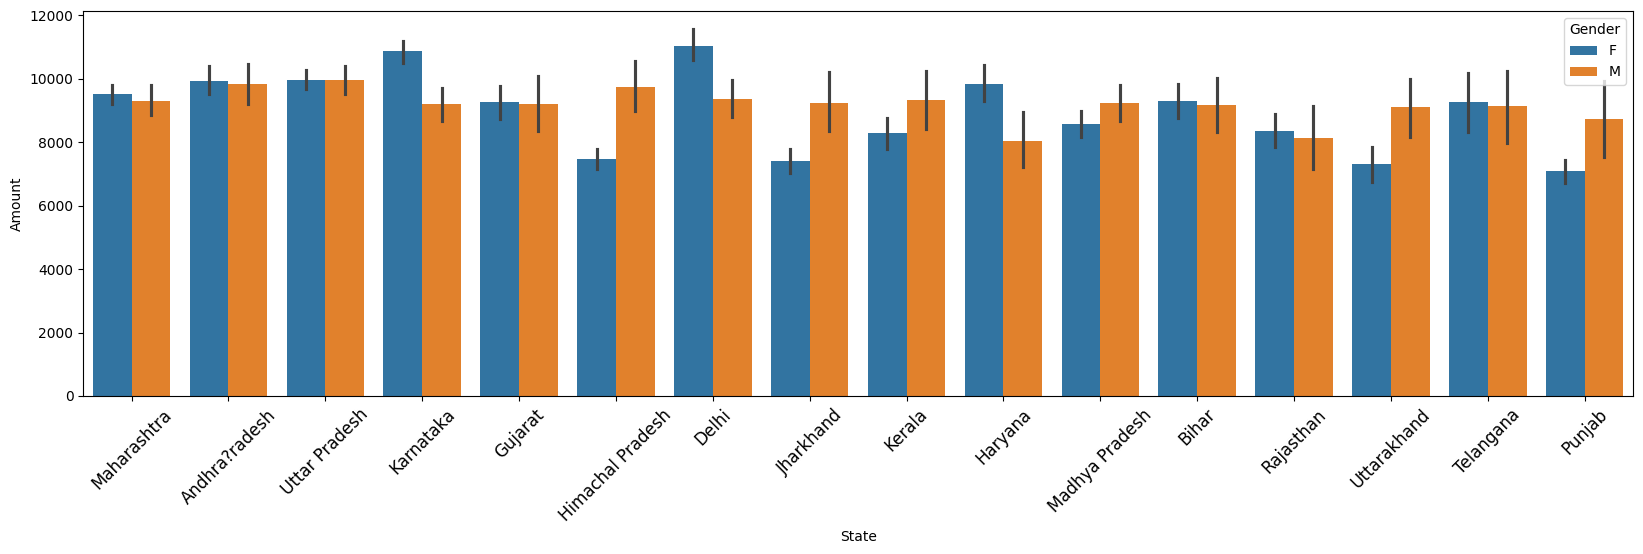

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Amount',data=df,hue='Gender')
plt.xticks(rotation=45,fontsize=12)
plt.show()

In [22]:
df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra?radesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


Text(0.5, 0, 'State')

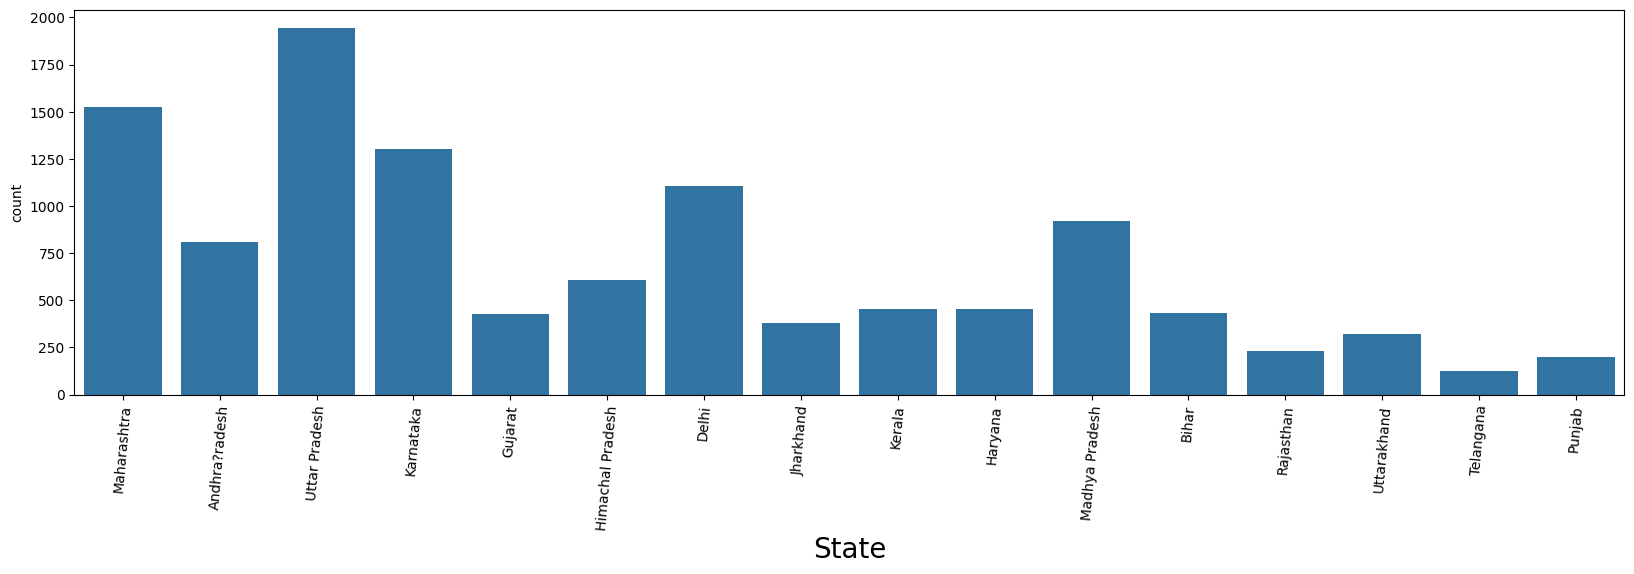

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(x='State',data=df)
plt.xticks(rotation=85)
plt.xlabel("State",fontsize=20)

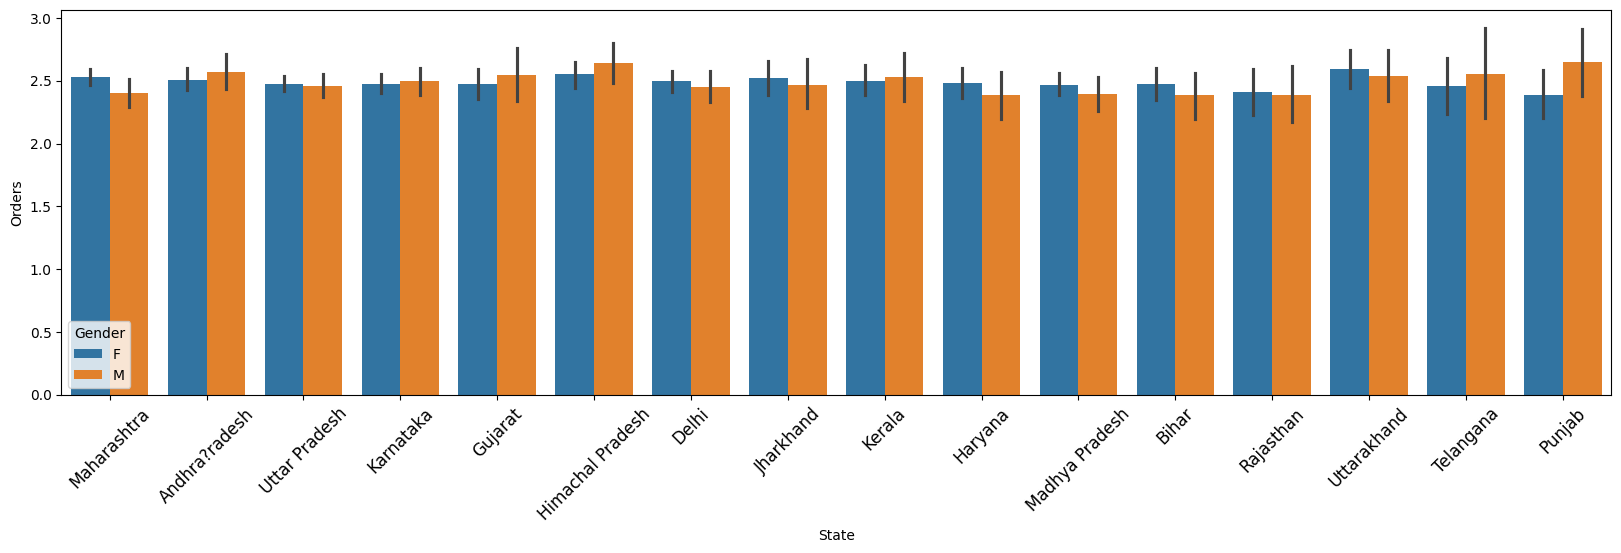

In [25]:
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Orders',data=df,hue='Gender')
plt.xticks(rotation=45,fontsize=12)
plt.show()

In [36]:
print(df['Occupation'].unique())

['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'Media' 'Banking' 'Retail' 'IT Sector' 'Aviation' 'Hospitality'
 'Agriculture' 'Textile' 'Chemical']


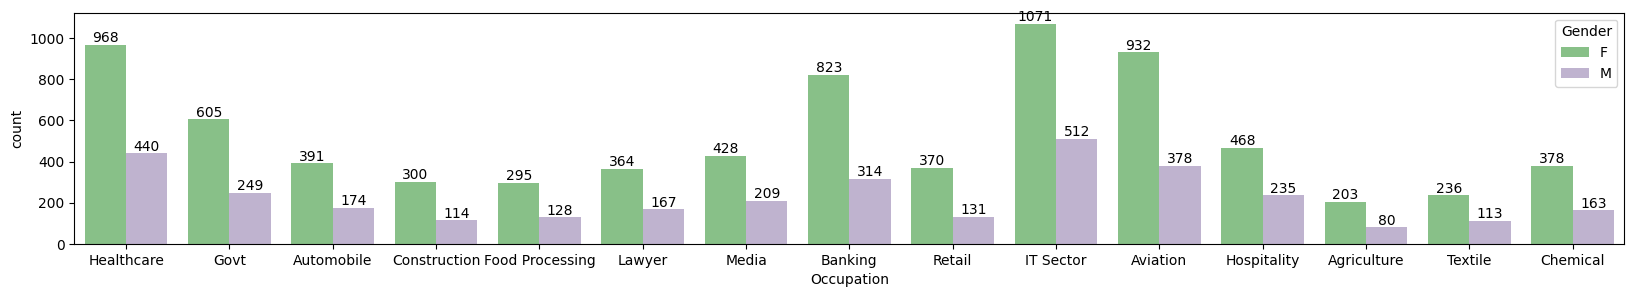

In [47]:
plt.figure(figsize=(20,3))
ax=sns.countplot(x='Occupation',data=df,hue='Gender',palette='Accent')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [44]:
df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

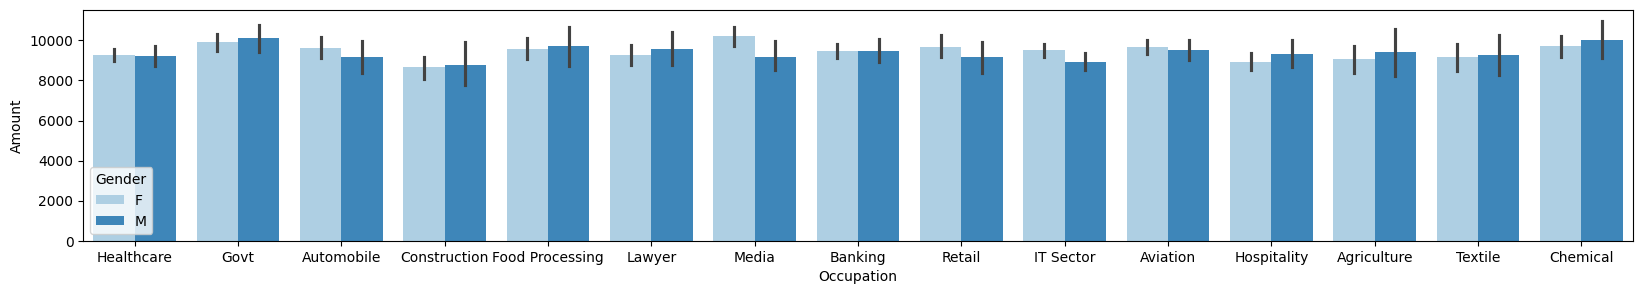

In [54]:
plt.figure(figsize=(20,3))
sns.barplot(x='Occupation',y='Amount',data=df,hue='Gender',saturation=0.9,palette='Blues')

i noticed that female purchase/orders more as compared to man their job secotr is healthcare,aviation,it sector and last but not the least banking occupation also the least orders is in talenagana,punjab and rajistan the human who purchases in that place are mostly men especialy the age group that buy the most is 26 to 35 that a newly married family who urge to celebrate the event in heavy demands in that also the family orders the most